# <div style="text-align: center; background-color: #0C6A86; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">🏠EDA on House Rent Prediction Dataset</div>

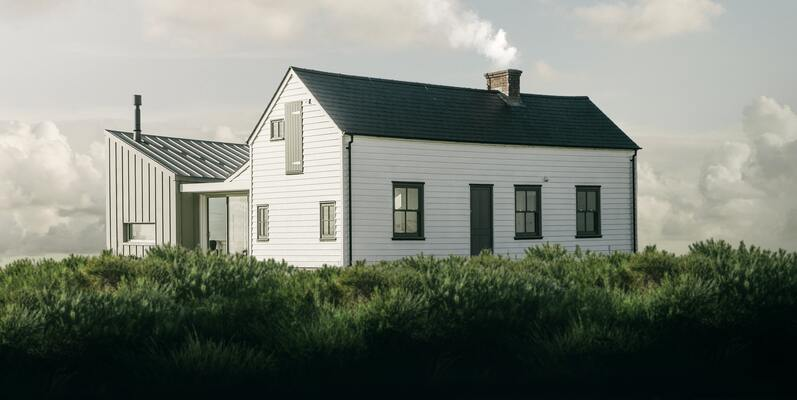

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset📁</h3>


<h4>House Rent Prediction Dataset contains <mark>12 columns</mark>, each are:</h4>
<p><b>BHK</b>: Number of Bedrooms, Hall, Kitchen.</p>
<p><b>Rent</b>: Rent of the Houses/Apartments/Flats.
<p><b>Size</b>: Size of the Houses/Apartments/Flats in Square Feet.
<p><b>Floor</b>: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
<p><b>Area Type</b>: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
<p><b>Area Locality</b>: Locality of the Houses/Apartments/Flats.
<p><b>City</b>: City where the Houses/Apartments/Flats are Located.
<p><b>Furnishing Status</b>: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
<p><b>Tenant Preferred</b>: Type of Tenant Preferred by the Owner or Agent.
<p><b>Bathroom</b>: Number of Bathrooms.
<p><b>Point of Contact</b>: Whom should you contact for more information regarding the Houses/Apartments/Flats

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">Preprocessing Part</h3>


* [Import Packages and Define Useful Functions](#1)
* [Cleaning Data](#2)
#### Analysis Part

* [plotting and visualization](#0.1)
* [WordCloud on Area Locality](#0.3)

<h3 id ="1" style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Import Packages and Define Useful Functions🔎</h3>

In [ ]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import missingno as msno
import country_converter as coco
from wordcloud import WordCloud
import nltk

In [ ]:
df=pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
df.tail()


In [ ]:
def get_histogram(df,col_name):
        
    fig=px.histogram(
        x=df[col_name],
        color_discrete_sequence=px.colors.sequential.Viridis,
        template='plotly_dark',
        text_auto=True
        
        ).update_xaxes(categoryorder='total descending')
    fig.show()


In [ ]:
def get_pie(df,col_name):

    fig = px.pie(values=df[col_name].value_counts().values, 
             names=df[col_name].value_counts().index, 
             color_discrete_sequence=px.colors.sequential.Viridis,
             template='plotly_dark'
             )
    fig.update_traces(textinfo='label+percent+value', textfont_size=13 )
    fig.show()



<h3 id="2" style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">🗑Cleaning Data</h3>

In [ ]:
msno.matrix(df)


In [ ]:
df.shape

In [ ]:
print(df.info())
print ('=' *50 )
print(df.describe())
print('='*50)
df.isna().sum()

In [ ]:
# Splitting posted on column and creating new variables
df['Post_Day'] = df['Posted On'].apply(lambda x: x.split('-')[2]).str.lstrip('0')
df['Post_Month'] = df['Posted On'].apply(lambda x: x.split('-')[1]).str.lstrip('0')
df['Floor Level']=df['Floor'].apply(lambda x: x.split('out of')[0])
df['total floor']=df['Floor'].apply(lambda x: x.split('out of')[-1])
df.drop(['Floor','Posted On'],axis=1,inplace= True)
df.head()

In [ ]:
df['Point of Contact']=df['Point of Contact'].apply(lambda x: x.split(' ')[-1])
df['Point of Contact']=df['Point of Contact'].apply(lambda x:'Owner' if x=='Builder' else x)
df['Point of Contact'].head()

In [ ]:

df['Floor Level']=df['Floor Level'].apply(lambda x: 0 if x =='Ground'or x=='Ground 'or x=='Upper Basement ' or x=='Lower Basement ' else x)
                              
df.head()


In [ ]:
df['Floor Level'].value_counts().index


<h3 id="0.1" style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 📊plotting and visualization</h3>

In [ ]:
get_pie(df,'City')
get_histogram(df,'City')

In [ ]:
get_pie(df,'Furnishing Status')
get_histogram(df,'Furnishing Status')


In [ ]:
get_pie(df,'Tenant Preferred')
get_histogram(df,'Furnishing Status')

In [ ]:
get_pie(df,'Area Type')
get_histogram(df,'Furnishing Status')

In [ ]:
get_pie(df,'Point of Contact')
get_histogram(df,'Furnishing Status')

In [ ]:
get_pie(df,'Post_Month')
get_histogram(df,'Furnishing Status')

In [ ]:
C = df['City'].unique().tolist()
avg_rent = [df['Rent'].loc[df['City']==i].sum()/df['Rent'].loc[df['City']==i].shape[0] for i in C]

px.bar(x=C, y=avg_rent, color=avg_rent, color_continuous_scale='jet',template = 'plotly_dark',text_auto = True)




<h3 id ="0.3"style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">WordCloud on Area Locality</h3>

In [ ]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


In [ ]:

freq_df = Freq_df(df['Area Locality'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud on Area Locality')
